In [2]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 1], ['d', 2]],
                   columns=['letter', 'number'])

result = pd.concat([df1, df2]).reset_index(drop=True)
print(result)


  letter  number
0      a       1
1      b       2
2      c       1
3      d       2


In [3]:
# Create DataFrames
df1_dict = {'id': ['1', '2', '3', '4', '5'], 'Feature1': ['A', 'C', 'E', 'G', 'I'], 'Feature2': ['B', 'D', 'F', 'H', 'J']}
df1 = pd.DataFrame(df1_dict, columns=['id', 'Feature1', 'Feature2'])

df2_dict = {'id': ['1', '2', '6', '7', '8'], 'Feature1': ['K', 'M', 'O', 'Q', 'S'], 'Feature2': ['L', 'N', 'P', 'R', 'T']}
df2 = pd.DataFrame(df2_dict, columns=['id', 'Feature1', 'Feature2'])

# Inner merge (first output)
inner_merge = pd.merge(df1, df2, on='id', how='inner')
print(inner_merge)

# Outer merge with custom suffixes (second output)
outer_merge = pd.merge(df1, df2, on='id', how='outer', suffixes=('_df1', '_df2'))
print(outer_merge)


  id Feature1_x Feature2_x Feature1_y Feature2_y
0  1          A          B          K          L
1  2          C          D          M          N
  id Feature1_df1 Feature2_df1 Feature1_df2 Feature2_df2
0  1            A            B            K            L
1  2            C            D            M            N
2  3            E            F          NaN          NaN
3  4            G            H          NaN          NaN
4  5            I            J          NaN          NaN
5  6          NaN          NaN            O            P
6  7          NaN          NaN            Q            R
7  8          NaN          NaN            S            T


In [4]:
# Generate dates and tickers
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

# Create indexes
index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# Create DataFrames
market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 3), columns=['Open','Close','Close_Adjusted'])
alternative_data = pd.DataFrame(index=index_alt, data=np.random.randn(len(index_alt), 2), columns=['Twitter','Reddit'])

# Merge with market_data as reference
merged = market_data.join(alternative_data, how='left').fillna(0)
print(merged.head(10))


                       Open     Close  Close_Adjusted   Twitter    Reddit
Date       Ticker                                                        
2021-01-01 AAPL    1.372099  0.395455       -0.421215  0.013221 -0.867669
           FB     -0.077251  0.813897       -0.000037  0.399663  0.598807
           GE     -0.466587 -0.964317        1.010375  0.944634  0.725142
           AMZN   -0.765704 -1.270169       -0.374002  1.953836 -0.226153
           DAI    -1.190098  1.167919        1.290909  0.075956  1.605222
2021-01-04 AAPL   -0.271713 -1.006941       -0.073501 -0.069997 -0.477994
           FB     -1.907263 -1.223112       -0.085717  0.404221  0.056530
           GE      0.944621 -0.161259        0.527041 -0.068544  1.463596
           AMZN    1.880305  0.518711       -1.006707  0.378168 -1.243330
           DAI    -0.610910  1.035021       -0.340169  1.355485  0.319479


In [6]:
def winsorize(df, quantiles):
    lower, upper = np.percentile(df, [q*100 for q in quantiles])
    return df.clip(lower=lower, upper=upper)

# Test winsorize function
df = pd.DataFrame(range(1,11), columns=['sequence'])
print(winsorize(df, [0.20, 0.80]).to_markdown())

# Create grouped data
groups = np.concatenate([np.ones(10), np.ones(10)+1, np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])
df = pd.DataFrame(data=zip(groups, range(1,51)), columns=["group", "sequence"])

# Apply winsorize to each group
result = df.groupby('group')['sequence'].apply(lambda x: winsorize(x, [0.05, 0.95]))
print(result.head(11).to_markdown())

|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |
|           |   sequence |
|:----------|-----------:|
| (1.0, 0)  |       1.45 |
| (1.0, 1)  |       2    |
| (1.0, 2)  |       3    |
| (1.0, 3)  |       4    |
| (1.0, 4)  |       5    |
| (1.0, 5)  |       6    |
| (1.0, 6)  |       7    |
| (1.0, 7)  |       8    |
| (1.0, 8)  |       9    |
| (1.0, 9)  |       9.55 |
| (2.0, 10) |      11.45 |


In [7]:
# Create products DataFrame
df = pd.DataFrame({'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100, 99.99], 'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']})

# Compute min, max, mean for each product
result = df.groupby('product')['value'].agg(['min', 'max', 'mean'])
print(result)

                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220


           Prediction                                        
Ticker           AAPL      AMZN       DAI        FB        GE
Date                                                         
2021-01-01   0.728308 -1.513339 -2.778414 -0.630729  1.651006
2021-01-04  -0.361288 -1.237935  0.909440 -0.049975  0.596400
2021-01-05  -0.308395  0.312773  0.209546 -0.431494  0.077090


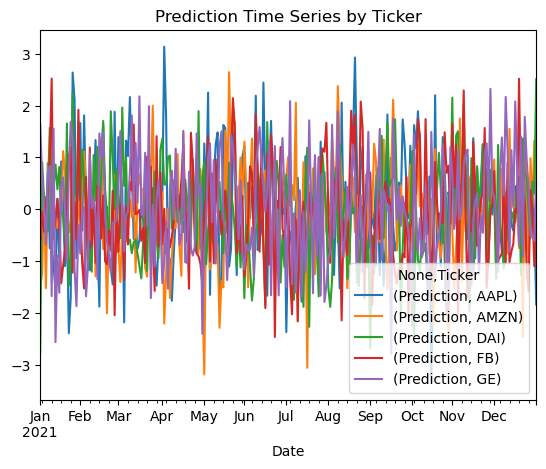

In [8]:
import matplotlib.pyplot as plt

# Create MultiIndex DataFrame
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])
market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 1), columns=['Prediction'])

# Unstack the DataFrame
unstacked = market_data.unstack('Ticker')
print(unstacked.head(3))

# Plot time series
unstacked.plot(title='Prediction Time Series by Ticker')
plt.show()